# ** Gas Turbine Problem **

# 1. Business Problem
    Predicting turbine energy yield (TEY) using ambient variables as features.

# 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import batch_normalization_v1
from keras import backend
from keras.optimizers import adam_v2
from sklearn.metrics import r2_score

# 3. Data Collection and Description

In [2]:
gas_tey = pd.read_csv('gas_turbines.csv')
gas_tey1 = gas_tey.copy()
gas_tey1.head(10)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
5,7.6998,1010.7,92.708,3.5236,19.683,1059.8,549.97,114.72,10.626,3.4467,82.409
6,7.7901,1011.6,91.983,3.5298,19.659,1060.0,549.87,114.71,10.644,3.4874,82.440
7,7.7139,1012.7,91.348,3.5088,19.673,1059.8,549.92,114.71,10.656,3.6043,83.010
8,7.7975,1013.8,90.196,3.5141,19.634,1060.1,550.09,114.72,10.644,3.3943,82.284
9,8.0820,1015.0,88.597,4.0612,23.406,1083.0,550.21,131.70,11.679,1.9081,82.782


In [3]:
gas_tey1.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [4]:
gas_tey1.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


## Outlier Check

D:\STUDY\DataScience\5_Programming\Python\Anaconda\AnacondaFile\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


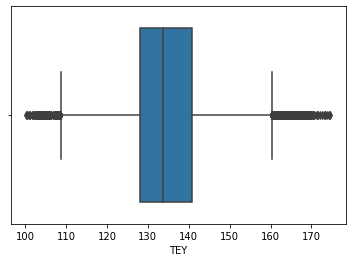

In [5]:
ax = sns.boxplot(gas_tey1['TEY'])

### Some outlier present in the data

Skew: 0.14596270190452942
Kurtosis: -0.4870582497451621


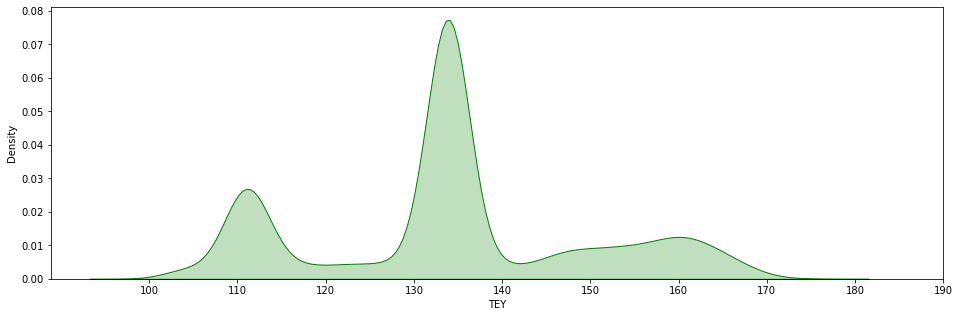

In [6]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(gas_tey1['TEY'].skew()))
print("Kurtosis: {}".format(gas_tey1['TEY'].kurtosis()))
ax = sns.kdeplot(gas_tey1['TEY'],shade=True,color='g')
plt.xticks([i for i in range(100,200,10)])
plt.show()

<ipython-input-7-d293638d9752>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(8,4,i)


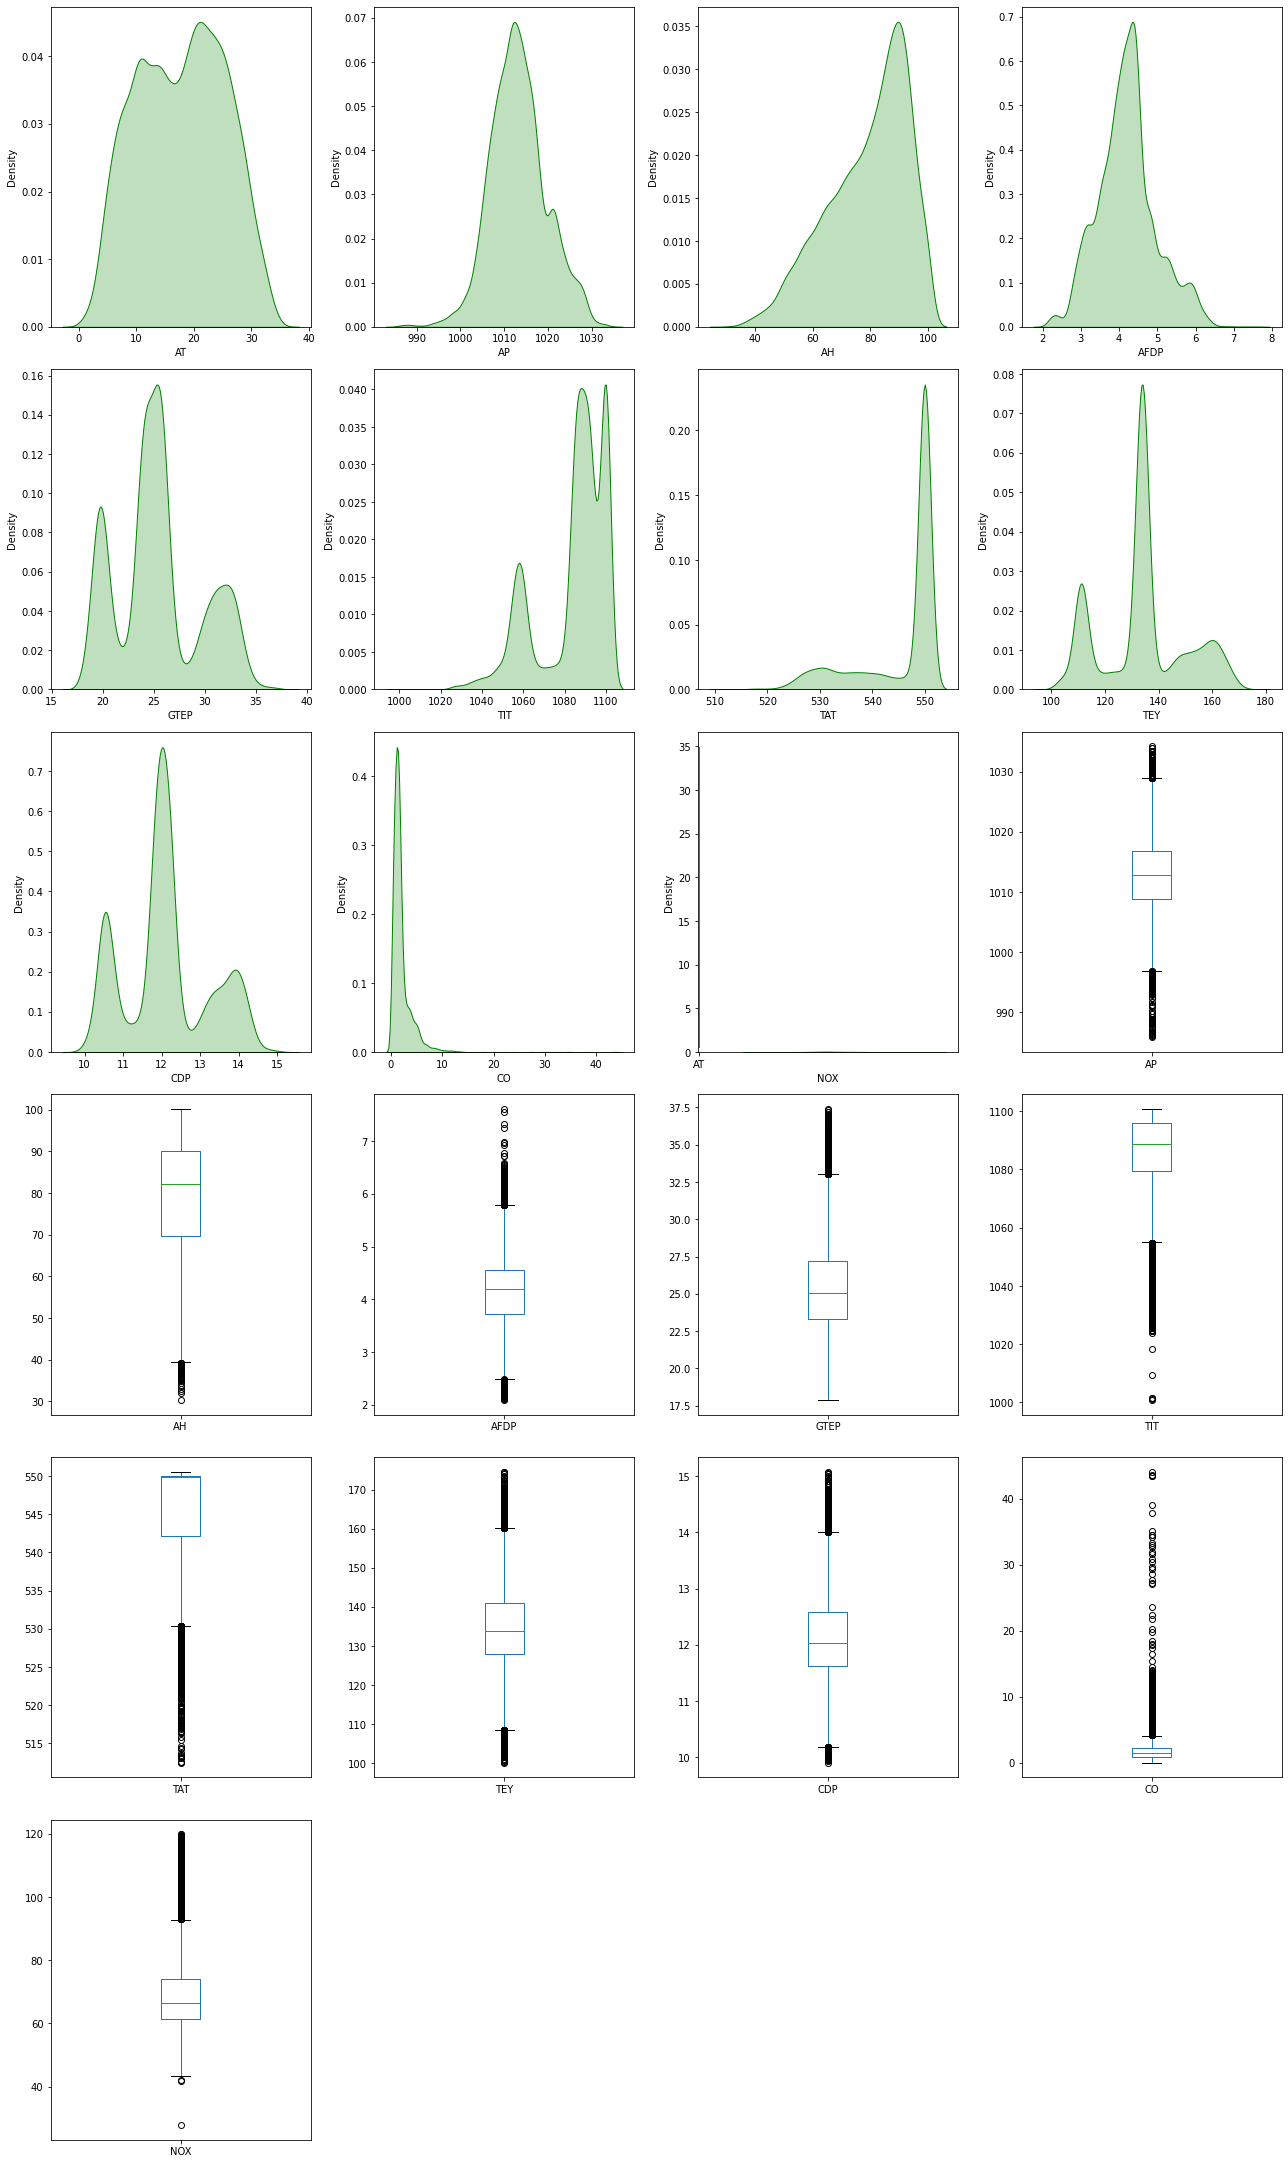

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
skewness,-0.030710,0.107601,-0.681224,0.315150,0.370987,-1.133744,-1.485524,0.145963,0.263042,6.534577,1.126605
kurtosis,-0.987597,0.424070,-0.282476,0.281642,-0.618358,0.375232,0.847637,-0.487058,-0.589420,82.518116,2.660381


In [7]:
num_columns = gas_tey1.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(gas_tey[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    gas_tey[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = gas_tey[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

## Finding Correlation

<AxesSubplot:>

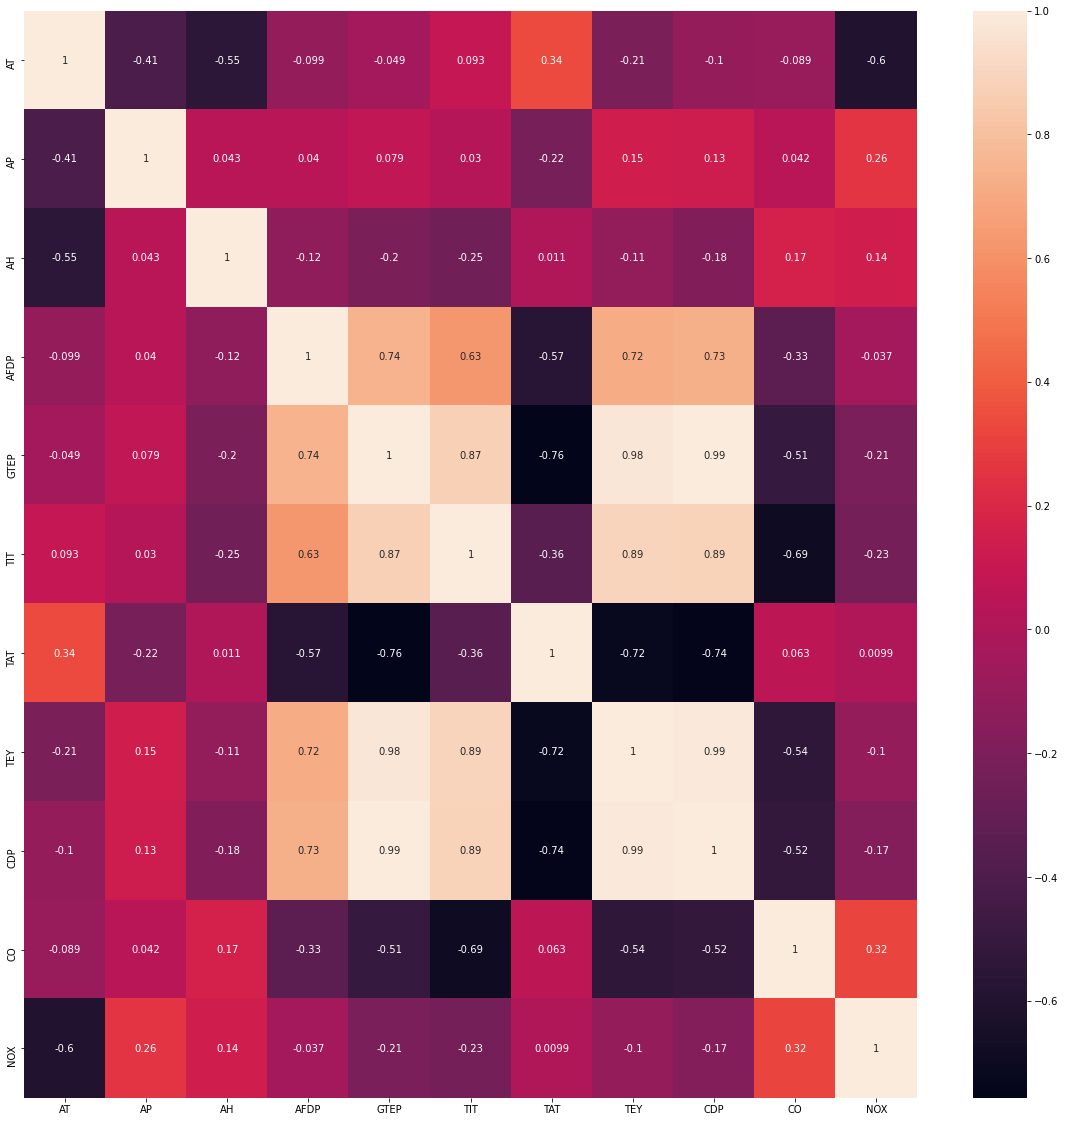

In [8]:
corr = gas_tey1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

# 4. Neural Network Model

In [9]:
X = gas_tey1.iloc[:, [True, True, True, True, True, True, True, False, True, True, True]]
y = gas_tey1.iloc[:,7]
x_train,x_test,y_train,y_test= train_test_split(X,y, test_size=0.3)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
gas_tey_model=Sequential()
gas_tey_model.add(Dense(64,input_dim=10,activation = 'relu'))
gas_tey_model.add(Dense(32,activation='relu'))
gas_tey_model.add(batch_normalization_v1.BatchNormalization())
gas_tey_model.add(Dense(1,activation='linear'))
opt = adam_v2.Adam(lr=0.0015)
gas_tey_model.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse])
history = gas_tey_model.fit(x_train,y_train,epochs = 50 ,batch_size=35,validation_split=0.1)

D:\STUDY\DataScience\5_Programming\Python\Anaconda\AnacondaFile\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/50
271/271 [==============================] - 2s 3ms/step - loss: 16918.5254 - rmse: 129.8011 - val_loss: 14846.8438 - val_rmse: 121.8304
Epoch 2/50
271/271 [==============================] - 0s 2ms/step - loss: 11241.6895 - rmse: 105.4993 - val_loss: 7391.7666 - val_rmse: 85.9689
Epoch 3/50
271/271 [==============================] - 1s 2ms/step - loss: 4422.8823 - rmse: 65.2921 - val_loss: 1974.7899 - val_rmse: 44.4285
Epoch 4/50
271/271 [==============================] - 1s 3ms/step - loss: 872.7161 - rmse: 28.0312 - val_loss: 223.6224 - val_rmse: 14.8812 1172.3606 - rms
Epoch 5/50
271/271 [==============================] - 0s 2ms/step - loss: 80.1425 - rmse: 7.8362 - val_loss: 9.7386 - val_rmse: 3.0089
Epoch 6/50
271/271 [==============================] - 1s 2ms/step - loss: 12.0433 - rmse: 2.7510 - val_loss: 1.1856 - val_rmse: 0.9131
Epoch 7/50
271/271 [==============================] - 1s 2ms/step - loss: 8.4802 - rmse: 2.3230 - val_loss: 0.6490 - val_rmse: 0.6362
Epoch 8/

In [10]:
gas_tey_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,945
Trainable params: 2,881
Non-trainable params: 64
_________________________________________________________________


# 5. Conclusion

In [11]:
y_predict = gas_tey_model.predict(x_test)
r2_score(y_test,y_predict)

0.9957618504189193

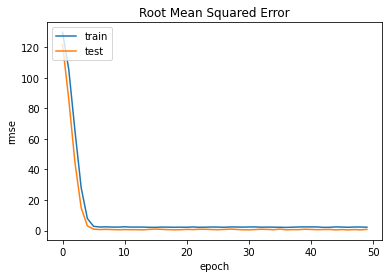

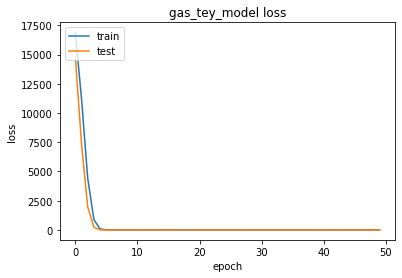

In [12]:
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('gas_tey_model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('4.png')
plt.show()

# ** Forest Fires Problem **

# 1. Business Problem
    Predict the burned area of forest fires with Neural Network.

# 2. Data Collection and Description

In [13]:
forest = pd.read_csv('forestfires.csv')
forest_df1 = forest.copy()
forest_df1.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


In [14]:
forest_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [15]:
forest_df1 = forest_df1.drop(['month'], axis=1)
forest_df1 = forest_df1.drop(['day'], axis=1)

In [16]:
forest_df1["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [17]:
forest_df1.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

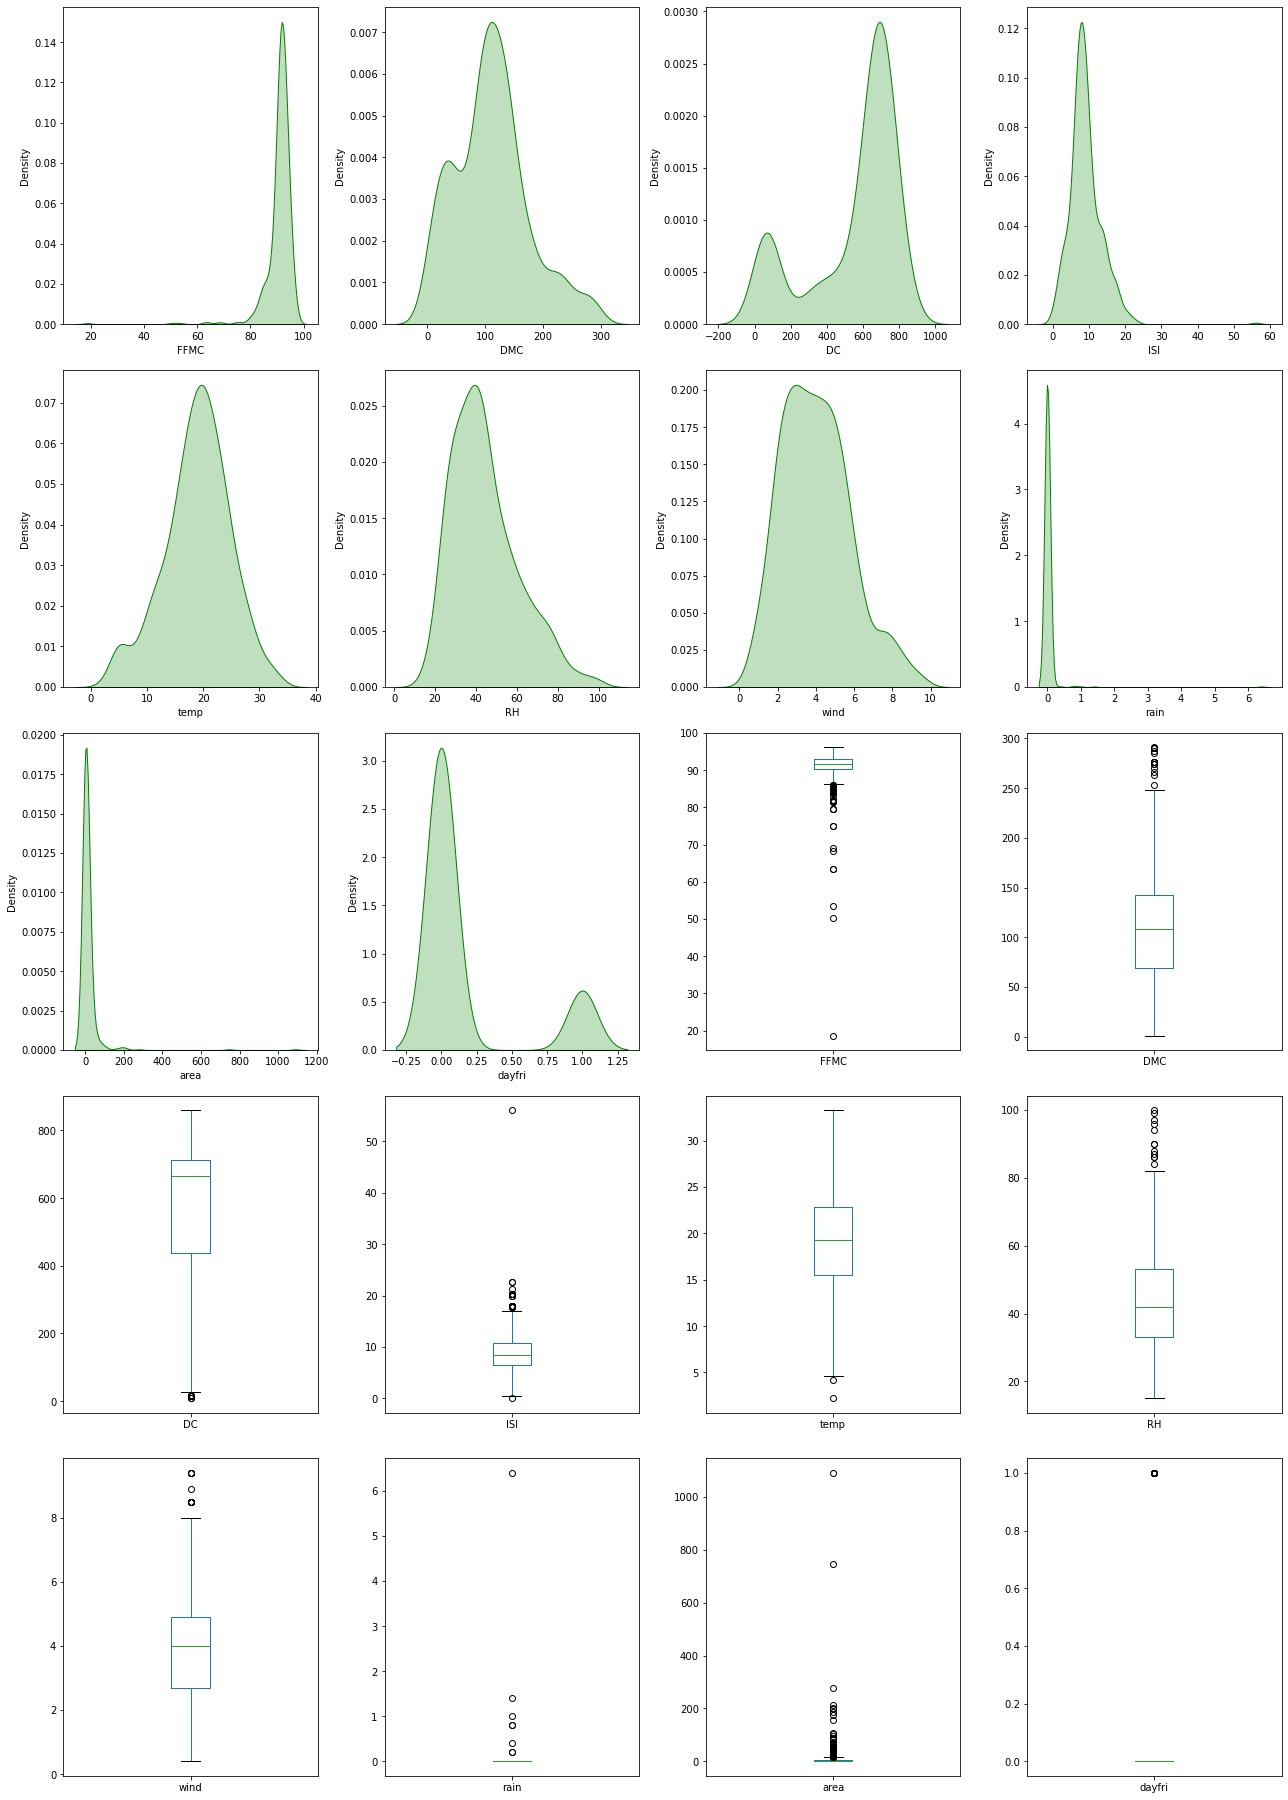

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri
skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344,12.846934,1.816105
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964,194.140721,1.303265


In [18]:
dfa = forest_df1[forest_df1.columns[0:10]]
month_colum = dfa.select_dtypes(include='object').columns.tolist()
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(forest[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    forest[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = forest[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

## Finding Correlation

<AxesSubplot:>

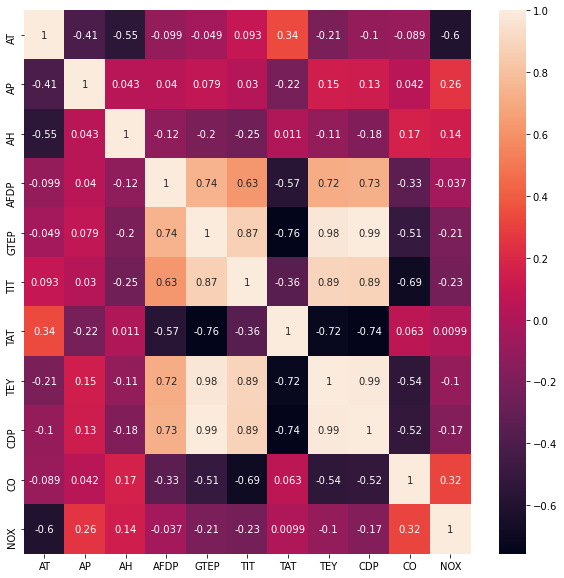

In [19]:
forest_corr = forest_df1[forest_df1.columns[0:11]].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# 3. Neural Network Model

In [20]:
mapping = {'small': 1, 'large': 2}
forest_df1 = forest_df1.replace(mapping)
X = np.array(forest_df1.iloc[:,0:28])
y = np.array(forest_df1.iloc[:,28])
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
X_norm = norm_func(X)
x_train,x_test,y_train,y_test= train_test_split(X_norm,y, test_size=0.2,stratify = y)
forest_model = Sequential()
forest_model.add(Dense(12, input_dim=28, activation='relu'))
forest_model.add(Dense(8, activation='relu'))
forest_model.add(Dense(1, activation='sigmoid'))
forest_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
forest_model.fit(x_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
42/42 [==============================] - 1s 2ms/step - loss: 0.6425 - accuracy: 0.7312
Epoch 2/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.7312
Epoch 3/150
42/42 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.7312
Epoch 4/150
42/42 [==============================] - 0s 2ms/step - loss: -0.1056 - accuracy: 0.7312
Epoch 5/150
42/42 [==============================] - 0s 2ms/step - loss: -0.4945 - accuracy: 0.7312
Epoch 6/150
42/42 [==============================] - 0s 2ms/step - loss: -0.8933 - accuracy: 0.7312
Epoch 7/150
42/42 [==============================] - 0s 2ms/step - loss: -1.3468 - accuracy: 0.7312
Epoch 8/150
42/42 [==============================] - 0s 2ms/step - loss: -1.9123 - accuracy: 0.7312
Epoch 9/150
42/42 [==============================] - 0s 2ms/step - loss: -2.6554 - accuracy: 0.7312
Epoch 10/150
42/42 [==============================] - 0s 2ms/step - loss: -3.5893 - accuracy: 0.7312
Ep

In [21]:
_, accuracy = forest_model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 0s 922us/step - loss: -6071.1812 - accuracy: 0.7312
Accuracy: 73.12


# 5. Conclusion

In [22]:
forest_predictions = forest_model.predict(x_train)
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), forest_predictions[i], y[i]))

[86.2, 26.2, 94.3, 5.1, 8.2, 51.0, 6.7, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] => 1 (expected 1)
[90.6, 35.4, 669.1, 6.7, 18.0, 33.0, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] => 1 (expected 1)
[90.6, 43.7, 686.9, 6.7, 14.6, 33.0, 1.3, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] => 1 (expected 1)
[91.7, 33.3, 77.5, 9.0, 8.3, 97.0, 4.0, 0.2, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] => 1 (expected 1)
[89.3, 51.3, 102.2, 9.6, 11.4, 99.0, 1.8, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] => 1 (expected 1)
